<a href="https://colab.research.google.com/github/asdddddddddd/2025_AI_TI1B/blob/main/jobsheet_9/tugas_praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

## Tugas Praktikum 01

### Percobaan 01

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_csv('diabetes.csv')
X = df[df.columns[:8]]
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best Parameter:", grid.best_params_)
print("Best Score (train):", grid.best_score_)
print("Accuracy (test):", grid.score(X_test, y_test))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

### Percobaan 02

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, g

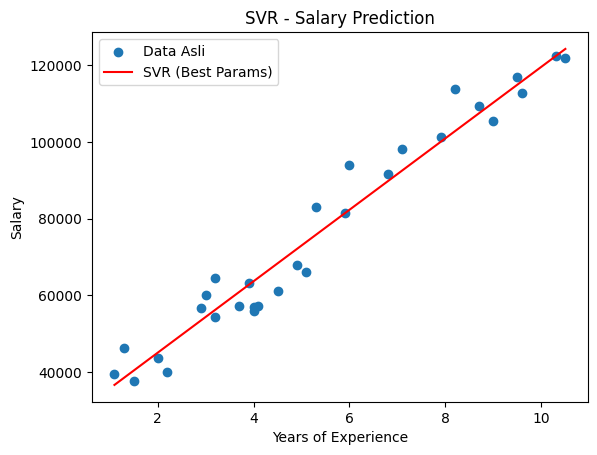

In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('Salary_Data.csv')
data.info()
data.head()
X = data['YearsExperience'].values[:, np.newaxis]
y = data['Salary'].values
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVR(), param_grid, refit=True, cv=5, verbose=2)
grid.fit(X, y)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best CV Score: {grid.best_score_:.2f}")
import matplotlib.pyplot as plt

best_model = grid.best_estimator_
plt.scatter(X, y, label='Data Asli')
plt.plot(X, best_model.predict(X), color='red', label='SVR (Best Params)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('SVR - Salary Prediction')
plt.legend()
plt.show()

## Tugas Praktikum 02

Best Parameter: {'var_smoothing': 1e-12}
Best CV Score: 0.896875
Test Accuracy: 0.875
Confusion Matrix:
 [[52  4]
 [ 6 18]]


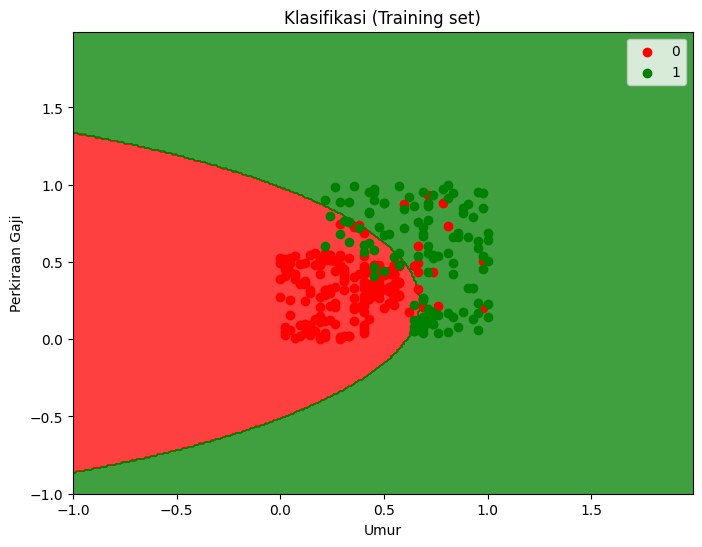

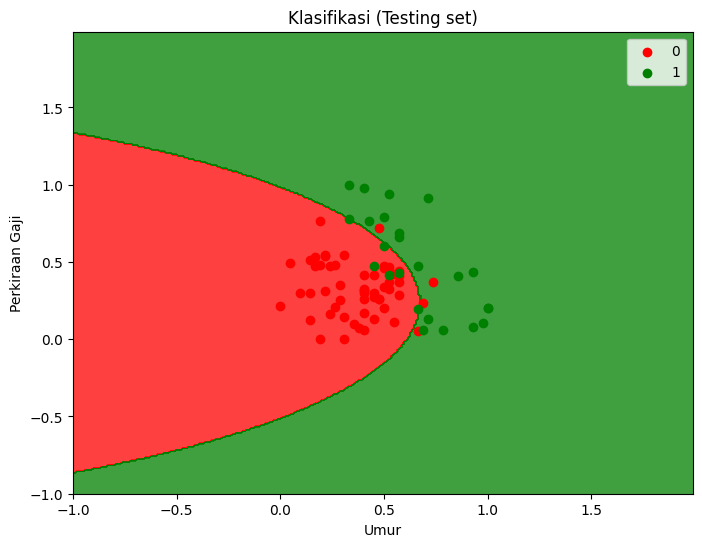

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
X = dataset.iloc[:, 2:-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

param_grid = {
    'var_smoothing': np.logspace(-12, -6, 20)
}
gnb = GaussianNB()
grid = GridSearchCV(gnb, param_grid, cv=5)
grid.fit(X_train, y_train)

best_params = {k: float(v) for k, v in grid.best_params_.items()}
print("Best Parameter:", best_params)
print("Best CV Score:", grid.best_score_)

y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

def plot_boundary(X_set, y_set, classifier, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2,
                 classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    colors = ['red', 'green']
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color=colors[i], label=j)

    plt.title(title)
    plt.xlabel('Umur')
    plt.ylabel('Perkiraan Gaji')
    plt.legend()
    plt.show()

plot_boundary(X_train, y_train.values, grid.best_estimator_, 'Klasifikasi (Training set)')
plot_boundary(X_test, y_test.values, grid.best_estimator_, 'Klasifikasi (Testing set)')
